In [1]:

import numpy as np
import pandas as pd



import seaborn as sns

In [2]:

df = pd.read_csv("data.txt",header = None)
df.head()

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [3]:

data=pd.DataFrame(df.values, columns = ["englishSpeaker", "CourseInstructor", "Course", "Semester","Classsize","grade"])
data.head()

,englishSpeaker,CourseInstructor,Course,Semester,Classsize,grade
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [4]:
data.isnull().sum()

englishSpeaker      0
CourseInstructor    0
Course              0
Semester            0
Classsize           0
grade               0
dtype: int64

In [5]:

data.Classsize.describe()

count    151.000000
mean      27.867550
std       12.893758
min        3.000000
25%       19.000000
50%       27.000000
75%       37.000000
max       66.000000
Name: Classsize, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   englishSpeaker    151 non-null    int64
 1   CourseInstructor  151 non-null    int64
 2   Course            151 non-null    int64
 3   Semester          151 non-null    int64
 4   Classsize         151 non-null    int64
 5   grade             151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


<ipython-input-7-a5a6aebe2af3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Classsize'])


<Axes: xlabel='Classsize', ylabel='Density'>

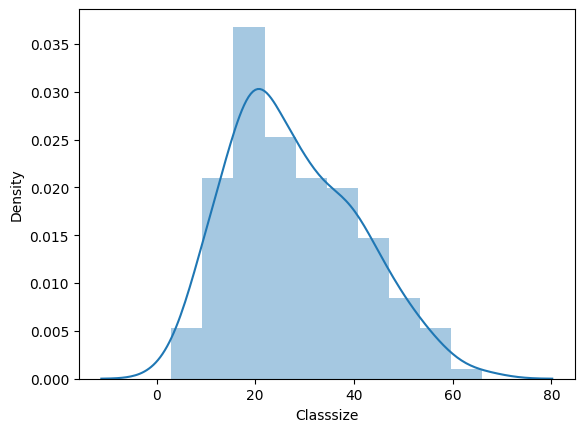

In [7]:

sns.distplot(data['Classsize'])

In [8]:
##QQ-plot
import statsmodels.api as sm
import pylab as py

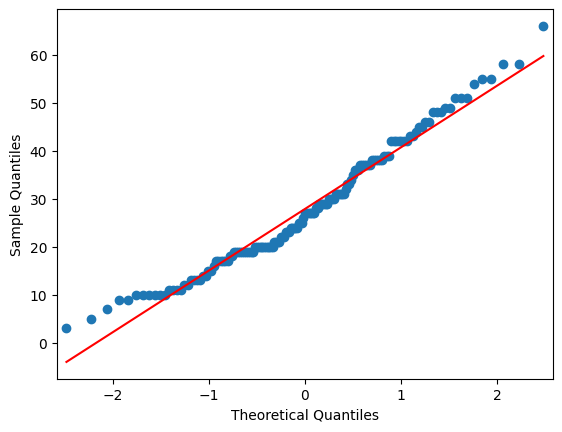

In [9]:
sm.qqplot(data.Classsize,line='s')
py.show()

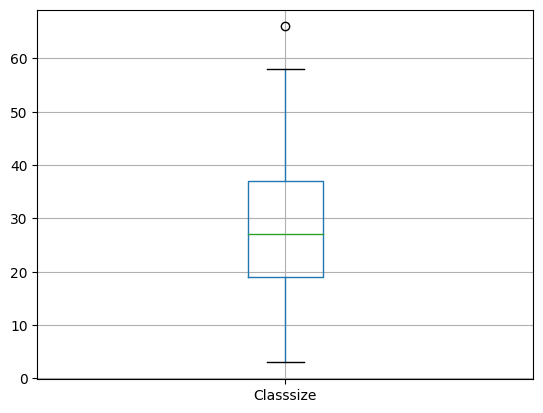

In [10]:
figure=data.boxplot(column="Classsize")

In [11]:
uppper_boundary=data['Classsize'].mean() + 3* data['Classsize'].std()
lower_boundary=data['Classsize'].mean() - 3* data['Classsize'].std()
print(lower_boundary), print(uppper_boundary),print(data['Classsize'].mean())

-10.813725641056461
66.5488249788048
27.867549668874172


(None, None, None)

In [12]:
data.loc[data['Classsize']>=66,'Classsize']=60
data.head()

,englishSpeaker,CourseInstructor,Course,Semester,Classsize,grade
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


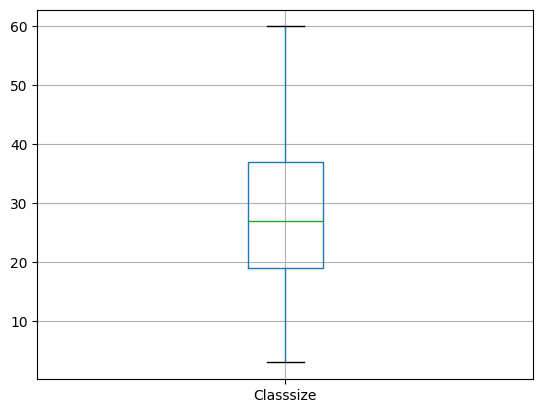

In [13]:

figure=data.boxplot(column="Classsize")

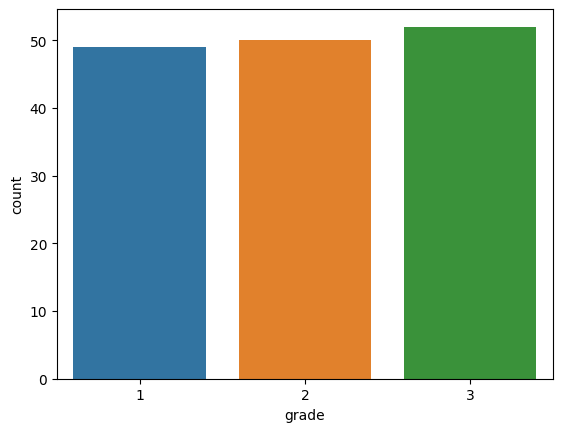

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='grade', data=data)
plt.show()


In [18]:
data_grade=data['grade'].value_counts()
data_grade

3    52
2    50
1    49
Name: grade, dtype: int64

* The class is balance

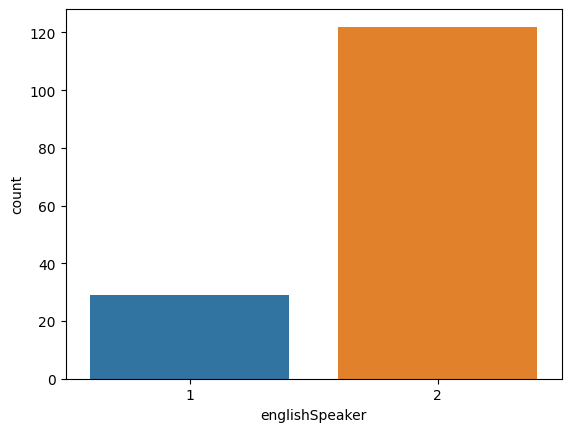

In [22]:
sns.countplot(x='englishSpeaker', data=data)
plt.show()

In [20]:
data_englishSpeaker=data['englishSpeaker'].value_counts()
data_englishSpeaker

2    122
1     29
Name: englishSpeaker, dtype: int64

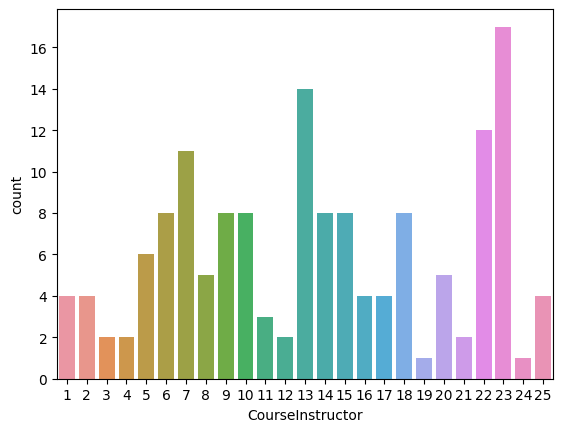

In [25]:
#Checking for CourseInstructor
sns.countplot(x='CourseInstructor',data=data)
plt.show()

In [26]:
data_CourseInstructor=data['CourseInstructor'].value_counts()
data_CourseInstructor.head()

23    17
13    14
22    12
7     11
9      8
Name: CourseInstructor, dtype: int64

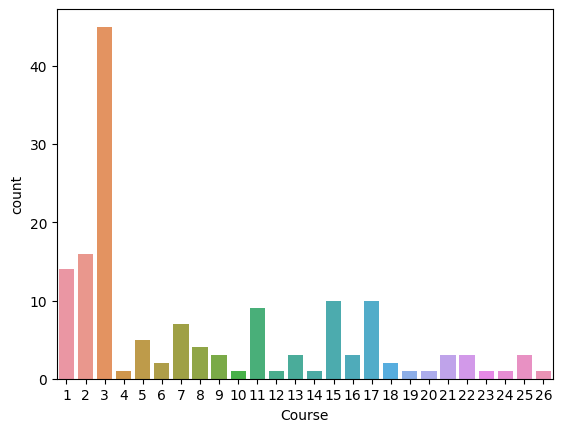

In [29]:
#Checking for Course
sns.countplot(x='Course',data=data)
plt.show()

In [30]:
summerSemesterdata=data[data['Semester']==1]
summerSemesterdata.head()

,englishSpeaker,CourseInstructor,Course,Semester,Classsize,grade
0,1,23,3,1,19,3
1,2,15,3,1,17,3
5,2,23,3,1,20,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


In [31]:
summerSemesterdata.shape

(23, 6)

In [32]:
#Regular semester data
regularSemesterdata=data[data['Semester']==2]
regularSemesterdata.head()

,englishSpeaker,CourseInstructor,Course,Semester,Classsize,grade
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3


In [33]:
regularSemesterdata.shape

(128, 6)

In [34]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()

In [35]:
X_data=data.iloc[:,:5]
y_data=data['grade']

In [36]:
model.fit(X_data,y_data)

ExtraTreesRegressor()

<Axes: >

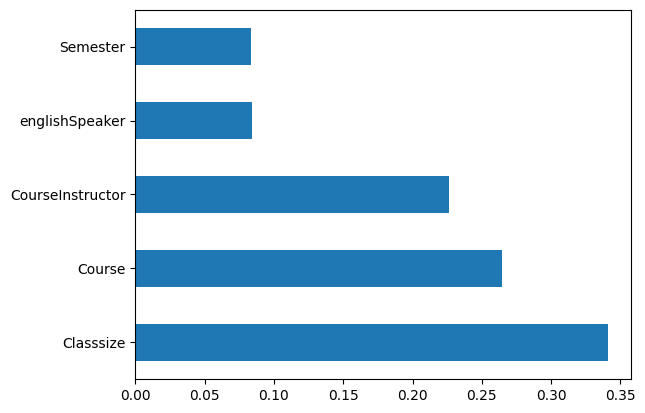

In [37]:
feature_importances=pd.Series(model.feature_importances_,index=X_data.columns)
feature_importances.nlargest(5).plot(kind='barh')

In [38]:
#contigency table
data_courseInstructor = pd.crosstab(data['Course'],
                            data['CourseInstructor'],
                               margins = False)
data_courseInstructor.head()

CourseInstructor,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
Course,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
2,0,0,2,0,6,0,0,0,2,0,...,0,0,0,0,4,2,0,0,0,0
3,0,0,0,0,0,0,0,4,0,6,...,0,0,0,0,0,0,8,17,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,3,0,...,0,0,2,0,0,0,0,0,0,0


<Axes: xlabel='CourseInstructor', ylabel='Course'>

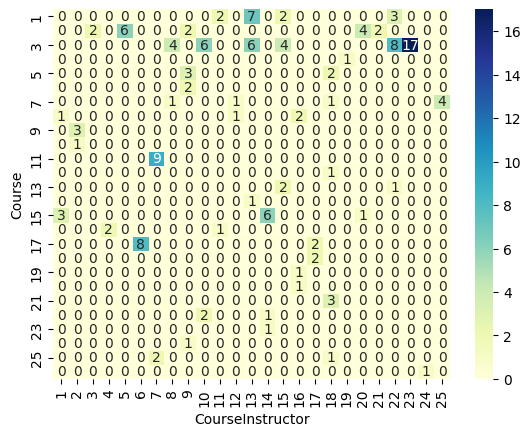

In [39]:

sns.heatmap(pd.crosstab(data.Course, data.CourseInstructor),
            cmap="YlGnBu", annot=True, cbar=True)

In [40]:

data_englishSpeaker= pd.crosstab([data.CourseInstructor,data.Course],
                            data['englishSpeaker'],
                               margins = False)
data_englishSpeaker.head()

englishSpeaker           1  2
CourseInstructor Course      
1                8       0  1
                 15      0  3
2                9       0  3
                 10      0  1
3                2       0  2

<Axes: xlabel='englishSpeaker', ylabel='CourseInstructor-Course'>

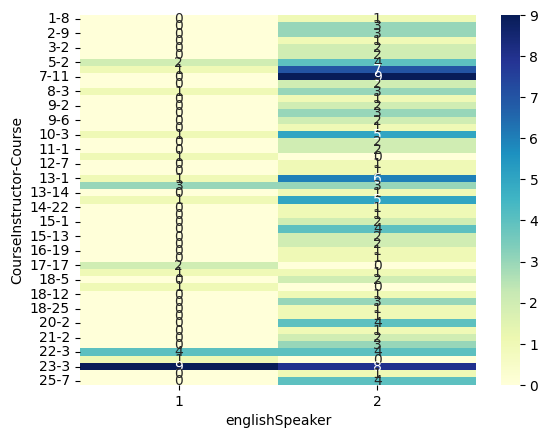

In [41]:

sns.heatmap(pd.crosstab([data.CourseInstructor,data.Course], data.englishSpeaker),
            cmap="YlGnBu", annot=True, cbar=True)

In [42]:

data_englishSpeaker= pd.crosstab([data.CourseInstructor,data.Course],
                            [data.englishSpeaker,data.Semester],
                               margins = False)
data_englishSpeaker.head(10)

englishSpeaker           1     2   
Semester                 1  2  1  2
CourseInstructor Course            
1                8       0  0  0  1
                 15      0  0  2  1
2                9       0  0  0  3
                 10      0  0  0  1
3                2       0  0  0  2
4                16      0  0  0  2
5                2       0  2  0  4
6                17      0  1  0  7
7                11      0  0  1  8
                 25      0  0  0  2

<Axes: xlabel='englishSpeaker-Semester', ylabel='CourseInstructor-Course'>

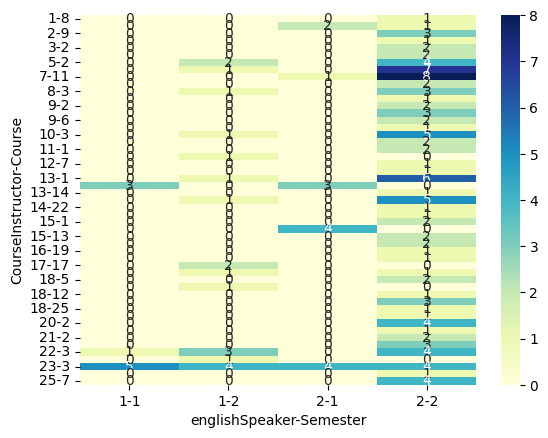

In [43]:

sns.heatmap(pd.crosstab([data.CourseInstructor,data.Course], [data.englishSpeaker,data.Semester]),
            cmap="YlGnBu", annot=True, cbar=True)

In [44]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [45]:
stat, p, dof, expected = chi2_contingency(data_courseInstructor)
print('dof=%d' % dof)
#print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('H0: The features CourseInstructor and Course are independent')
else:
	print('H1: CourseInstructor and Course are not independent (which means they are associated).')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('H0: The features CourseInstructor and Course are independent')
else:
	print('H1: CourseInstructor and Course are not independent (which means they are associated)')

dof=600
probability=0.950, critical=658.094, stat=1712.279
H0: The features CourseInstructor and Course are independent
significance=0.050, p=0.000
H0: The features CourseInstructor and Course are independent


In [46]:
stat, p, dof, expected = chi2_contingency(data_englishSpeaker)
print('dof=%d' % dof)
#print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('H0:All CourseInstructor are not englishSpeaker')
else:
	print('H1:All CourseInstructor are englishSpeaker(Rejecting null hypothesis)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('H0:All CourseInstructor are not englishSpeaker')
else:
	print('H1:All CourseInstructor are englishSpeaker(Rejecting null hypothesis)')

dof=150
probability=0.950, critical=179.581, stat=187.962
H0:All CourseInstructor are not englishSpeaker
significance=0.050, p=0.019
H0:All CourseInstructor are not englishSpeaker


In [50]:
#performing one hot encoding on the feature Course
data2= pd.get_dummies(data1.Course,prefix='Course',drop_first=True)
data2.head()

,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,...,Course_17,Course_18,Course_19,Course_20,Course_21,Course_22,Course_23,Course_24,Course_25,Course_26
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#performing one hot encoding on the feature CourseInstructor
data3 = pd.get_dummies(data1.CourseInstructor, prefix='CourseInstructor',drop_first=True)
data3.head()

,CourseInstructor_2,CourseInstructor_3,CourseInstructor_4,CourseInstructor_5,CourseInstructor_6,CourseInstructor_7,CourseInstructor_8,CourseInstructor_9,CourseInstructor_10,CourseInstructor_11,...,CourseInstructor_16,CourseInstructor_17,CourseInstructor_18,CourseInstructor_19,CourseInstructor_20,CourseInstructor_21,CourseInstructor_22,CourseInstructor_23,CourseInstructor_24,CourseInstructor_25
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# As the feature englishSpeaker is binary we need to convert in 0 and 1 to get good accuracy
data4=pd.DataFrame(data,columns=["englishSpeaker"])
englishSpeaker1=[]
for i in data4.englishSpeaker:
    if i==1:
        englishSpeaker1.append(0)
    else :
        englishSpeaker1.append(1)
data4['englishSpeaker1']=englishSpeaker1
data4.head()

,englishSpeaker,englishSpeaker1
0,1,0
1,2,1
2,1,0
3,1,0
4,2,1


In [57]:
# As the feature Semester is binary we need to convert in 0 and 1 to get good accuracy
data5=pd.DataFrame(data,columns=["Semester"])

Semester1=[]
for i in data5.Semester:
    if i==1:
        Semester1.append(0)
    else :
        Semester1.append(1)
data5['Semester1']=Semester1
data5.head()

,Semester,Semester1
0,1,0
1,1,0
2,2,1
3,2,1
4,2,1


In [58]:
#Combining the dataframe
data6= pd.concat([data4, data5],axis=1)
data6.head()

,englishSpeaker,englishSpeaker1,Semester,Semester1
0,1,0,1,0
1,2,1,1,0
2,1,0,2,1
3,1,0,2,1
4,2,1,2,1


In [61]:
#taking englishSpeaker1 and Semester1
data7=pd.DataFrame(data6,columns=["englishSpeaker1","Semester1"])
data7.head()

,englishSpeaker1,Semester1
0,0,0
1,1,0
2,0,1
3,0,1
4,1,1


In [63]:
#combining the features
data8= pd.concat([data2, data3],axis=1)
data8.head()

,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,...,CourseInstructor_16,CourseInstructor_17,CourseInstructor_18,CourseInstructor_19,CourseInstructor_20,CourseInstructor_21,CourseInstructor_22,CourseInstructor_23,CourseInstructor_24,CourseInstructor_25
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#combining the features
data10=pd.concat([data8, data7],axis=1)
data10.head()

,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,...,CourseInstructor_18,CourseInstructor_19,CourseInstructor_20,CourseInstructor_21,CourseInstructor_22,CourseInstructor_23,CourseInstructor_24,CourseInstructor_25,englishSpeaker1,Semester1
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [65]:
#Storing the feature Classsize in a seperate dataframe
data9=pd.DataFrame(data,columns=["Classsize"])
data9.head()

,Classsize
0,19
1,17
2,49
3,33
4,55


In [66]:
#from sklearn.preprocessing import StandardScaler
#sc= StandardScaler()
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
classsize = sc.fit_transform(data9)

In [67]:
data11=pd.DataFrame(classsize, columns=['classsize'])
data11.head()

,classsize
0,0.280702
1,0.245614
2,0.807018
3,0.526316
4,0.912281


In [68]:
X= pd.concat([data11, data10],axis=1)
X.head()

,classsize,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,...,CourseInstructor_18,CourseInstructor_19,CourseInstructor_20,CourseInstructor_21,CourseInstructor_22,CourseInstructor_23,CourseInstructor_24,CourseInstructor_25,englishSpeaker1,Semester1
0,0.280702,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.245614,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.807018,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.526316,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.912281,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [69]:
y=data['grade']
y.head()

0    3
1    3
2    3
3    3
4    3
Name: grade, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [72]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

In [73]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy_score: 0.8125


In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
confusion_matrix(y_test, y_pred)

array([[6, 1, 0],
       [0, 3, 2],
       [0, 0, 4]])

In [76]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.75      0.60      0.67         5
           3       0.67      1.00      0.80         4

    accuracy                           0.81        16
   macro avg       0.81      0.82      0.80        16
weighted avg       0.84      0.81      0.81        16



In [77]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10,1500)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}
